In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv('glass.data',header=None)
df.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
df.drop(['Id'], axis=1, inplace=True)
df


RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [108]:
#checking for skewness
df.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

In [109]:
X_data = df.drop(['Type'], axis=1)
y_data = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
X_data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]

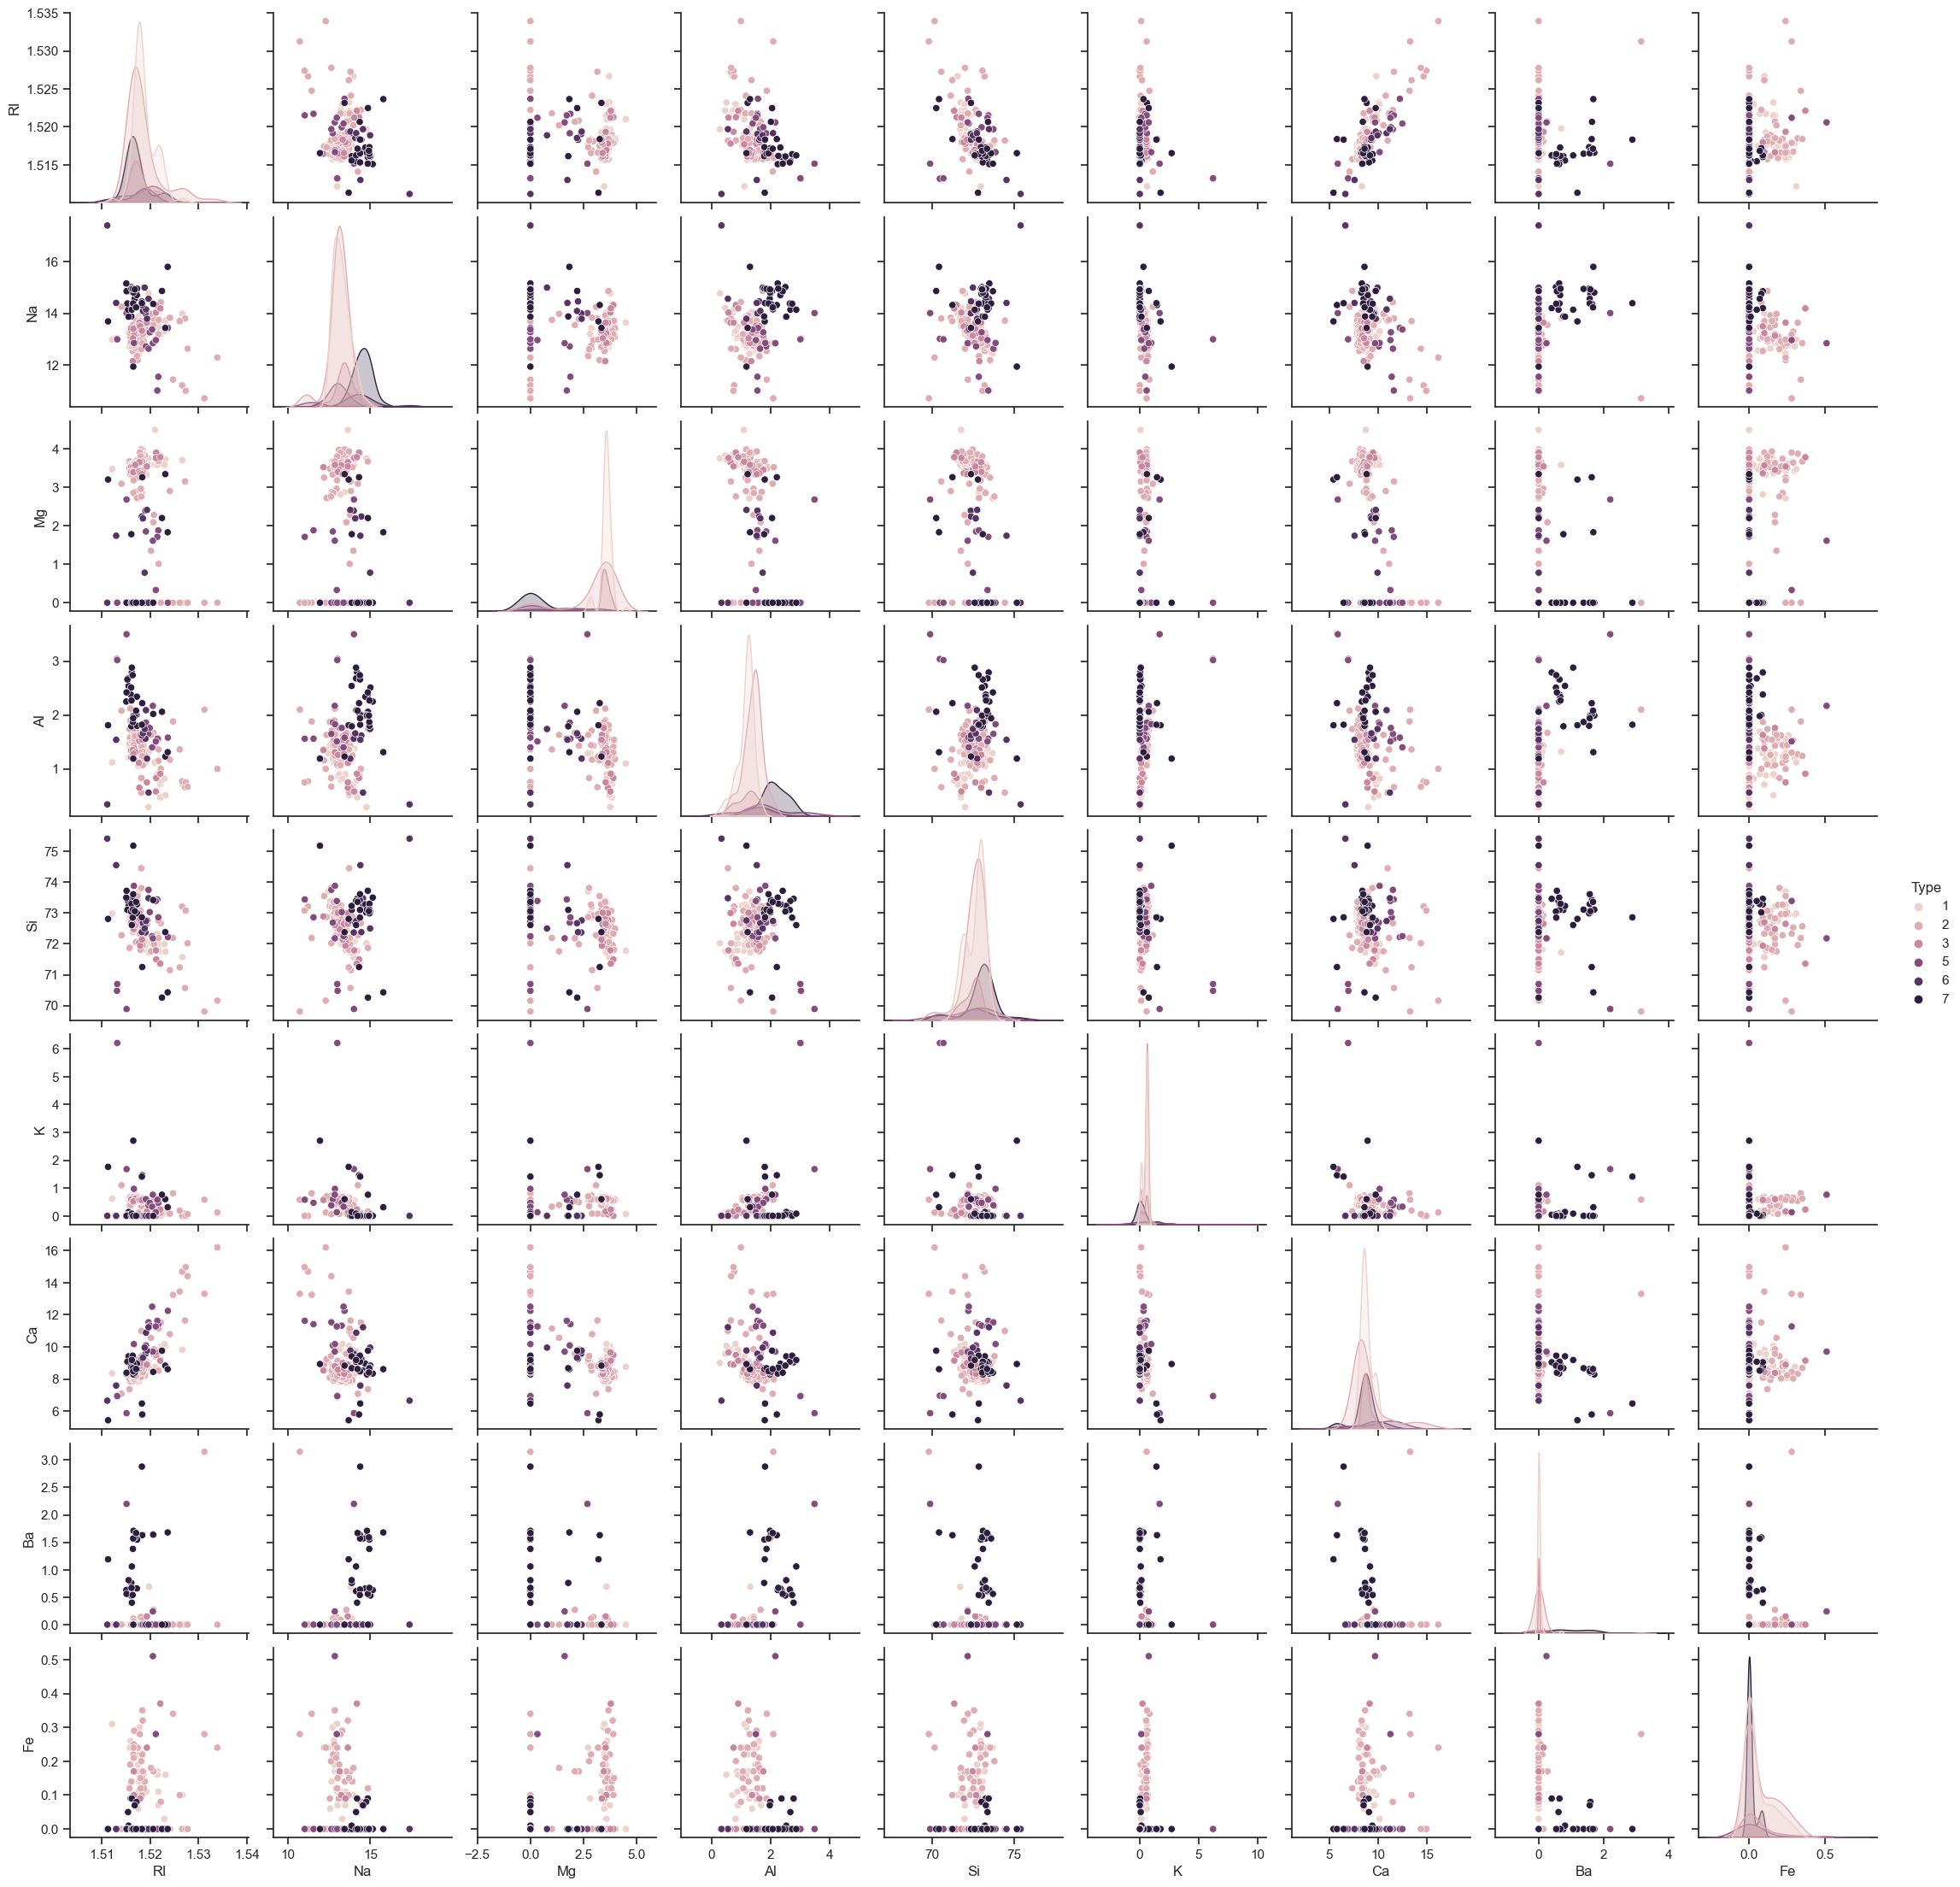

In [110]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, hue="Type")


<AxesSubplot: >

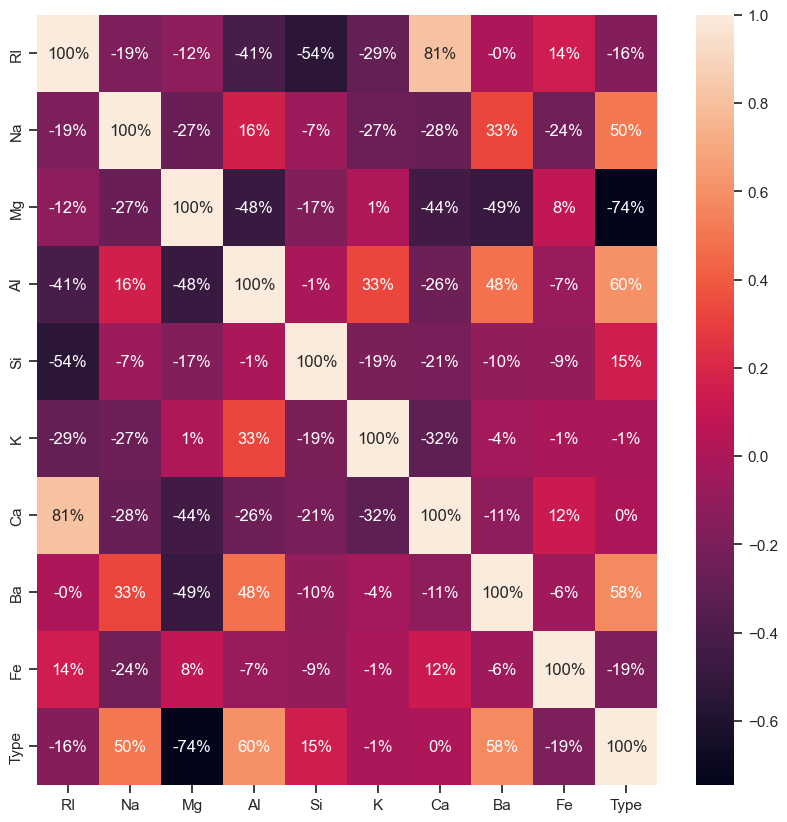

In [111]:
#plotting the heatmap to check the correlation of the features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')


Text(0, 0.5, 'Wccs')

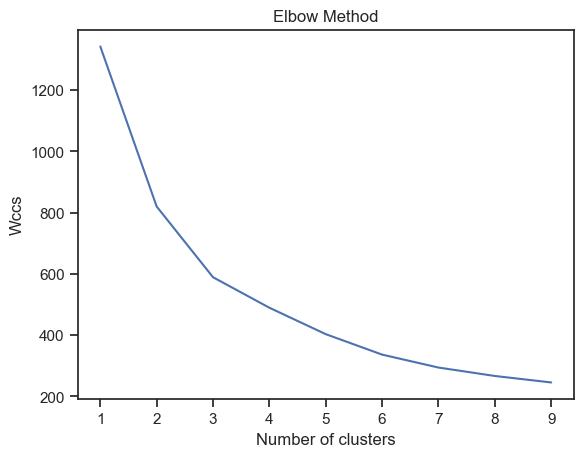

In [112]:
#implementing K-mean clustering
Wccs_list = []
from sklearn.cluster import KMeans
for k in range(1,10): 
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=5).fit(X_data)
    Wccs_list.append(kmeans.inertia_)
plt.plot(range(1,10),Wccs_list)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wccs')

In [113]:
kmeans = KMeans(n_clusters=3,n_init=10,random_state=5).fit(X_data)
kmeans.cluster_centers_


array([[1.51635839e+00, 1.44567742e+01, 1.97741935e-01, 2.12096774e+00,
        7.31235484e+01, 5.88387097e-01, 8.53838710e+00, 8.81935484e-01,
        1.25806452e-02],
       [1.51807772e+00, 1.32800617e+01, 3.45018519e+00, 1.33364198e+00,
        7.25923457e+01, 5.11049383e-01, 8.59290123e+00, 4.30246914e-02,
        6.36419753e-02],
       [1.52354762e+00, 1.28452381e+01, 4.49047619e-01, 1.30523810e+00,
        7.24052381e+01, 2.54285714e-01, 1.23833333e+01, 1.50000000e-01,
        7.14285714e-02]])

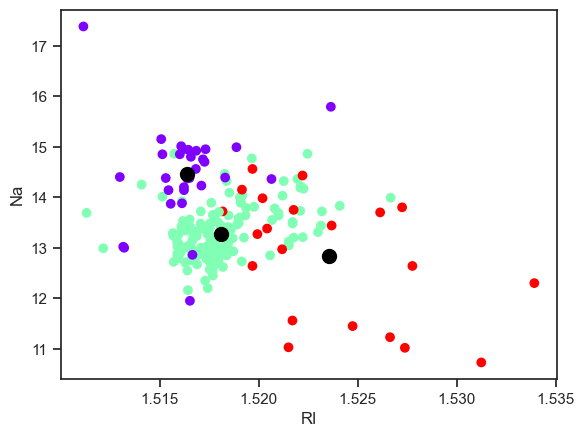

In [114]:
#visualzizing the clusters for RI and Na
plt.scatter(X_data['RI'], X_data['Na'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=100, color='black')
plt.xlabel('RI')
plt.ylabel('Na')
plt.show()

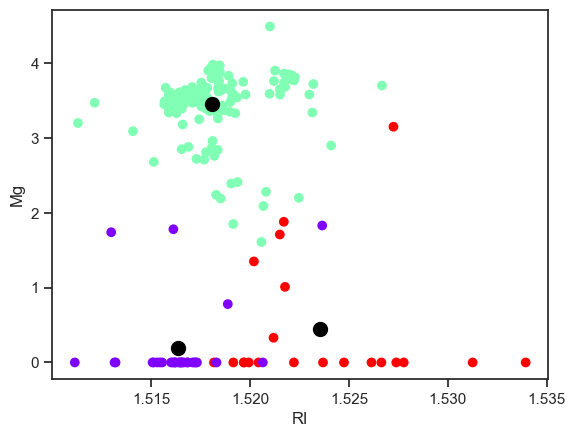

In [115]:
#visualzizing the clusters for RI and Mg
plt.scatter(X_data['RI'], X_data['Mg'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,2],s=100, color='black')
plt.xlabel('RI')
plt.ylabel('Mg')
plt.show()


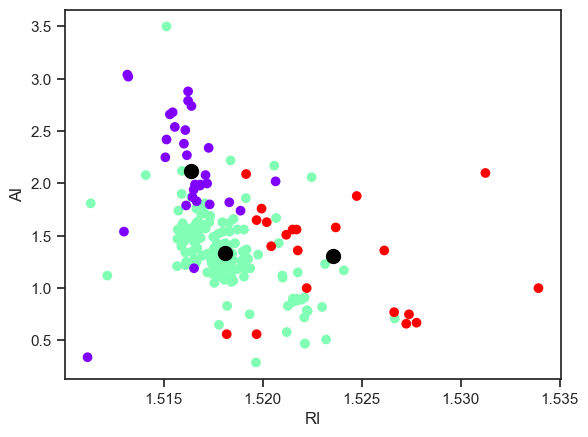

In [116]:
#visualizing the clusters for RI and Al
plt.scatter(X_data['RI'], X_data['Al'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,3], s=100,color='black')
plt.xlabel('RI')
plt.ylabel('Al')
plt.show()

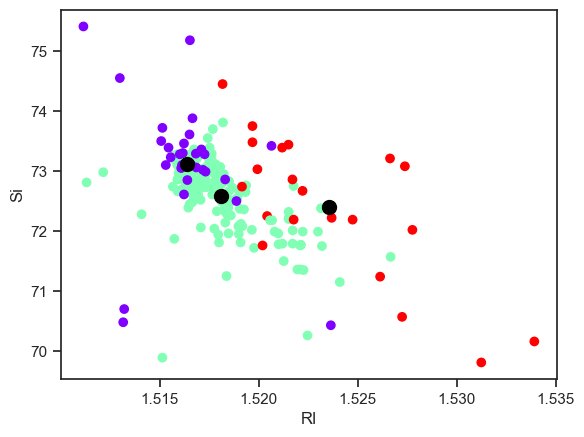

In [117]:
#visualizing the clusters for RI and Si
plt.scatter(X_data['RI'], X_data['Si'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,4],s=100,color='black')
plt.xlabel('RI')
plt.ylabel('Si')
plt.show()

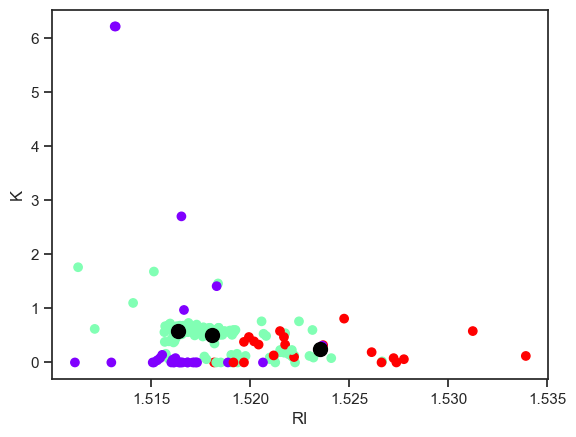

In [118]:
#visualizing the clusters for RI and K
plt.scatter(X_data['RI'], X_data['K'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,5],s=100, color='black')
plt.xlabel('RI')
plt.ylabel('K')
plt.show()

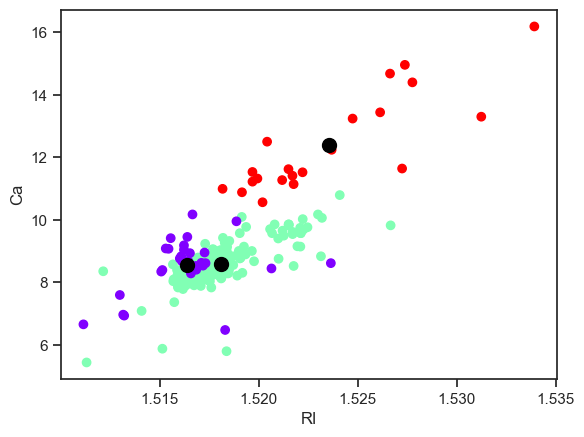

In [119]:
#visualizing the clusters for RI and Ca
plt.scatter(X_data['RI'], X_data['Ca'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,6],s=100, color='black')
plt.xlabel('RI')
plt.ylabel('Ca')
plt.show()

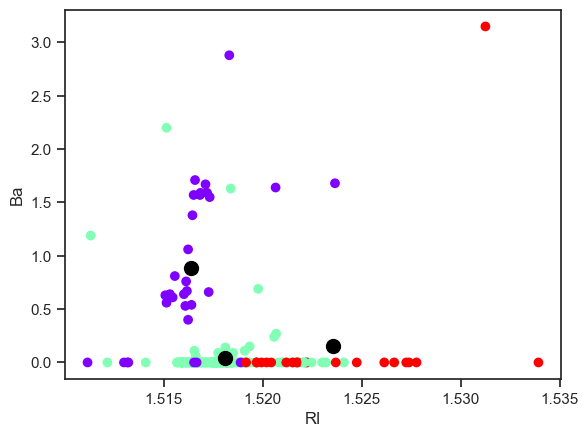

In [120]:
#visualizing the clusters for RI and Ba
plt.scatter(X_data['RI'], X_data['Ba'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,7],s=100, color='black')
plt.xlabel('RI')
plt.ylabel('Ba')
plt.show()

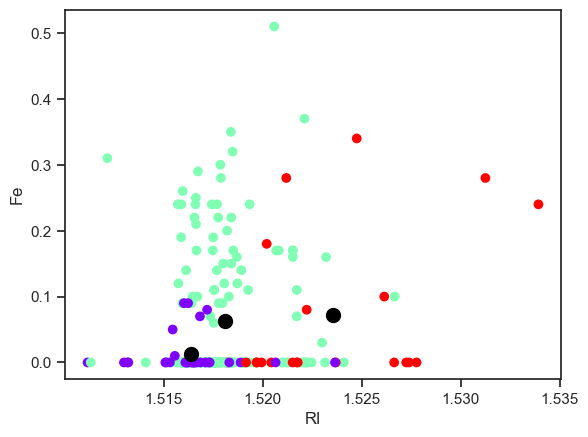

In [121]:
#visualizing the clusters for RI and Fe
plt.scatter(X_data['RI'], X_data['Fe'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,8],s=100, color='black')
plt.xlabel('RI')
plt.ylabel('Fe')
plt.show()

In [122]:
#calulating silhouette score
from sklearn.metrics import silhouette_score
silhouette_score_arr = []
best_number_clusters = 0
best_silhouette_score = 0
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=5).fit(X_data)
    silhouette_score_arr.append(silhouette_score(X_data, kmeans.labels_))
    if silhouette_score_arr[k-2] > best_silhouette_score:
        best_silhouette_score = silhouette_score_arr[k-2]
        best_number_clusters = k
print("Best number of clusters: ", best_number_clusters)
print("Best silhouette score: ", best_silhouette_score)


Best number of clusters:  4
Best silhouette score:  0.5890367504178873


Text(0, 0.5, 'Silhouette score')

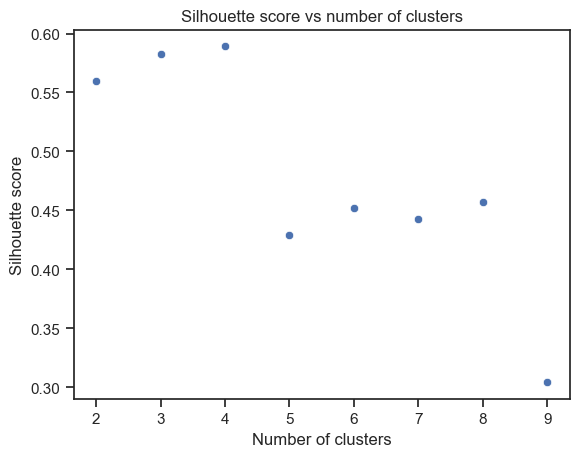

In [123]:
#plotting Silhouette score vs number of clusters
sns.scatterplot(x=range(2,10), y=silhouette_score_arr)
plt.title('Silhouette score vs number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')


Since we have checked for the silhouette score and the best score is  0.5890367504178873 is for the number of clusters = 4.
So the best value of k = 4.

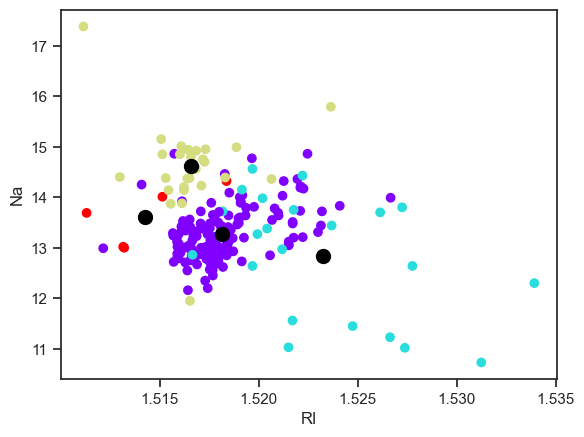

In [124]:
#plotting the best clusters together with the centroids
kmeans = KMeans(n_clusters=best_number_clusters,n_init=10,random_state=5).fit(X_data)
plt.scatter(X_data['RI'], X_data['Na'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=100, color='black')
plt.xlabel('RI')
plt.ylabel('Na')
plt.show()

Elbow method to find the clusters

Text(0, 0.5, 'Wccs')

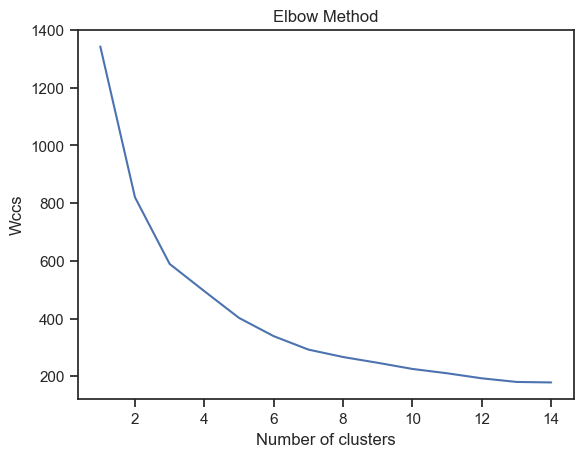

In [125]:

Wccs_list = []
from sklearn.cluster import KMeans
for k in range(1,15): 
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=20).fit(X_data)
    Wccs_list.append(kmeans.inertia_)
plt.plot(range(1,15),Wccs_list)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wccs')

So from the elbow method we can see that after the value of k = 5 it doesn't decrease the value of the Wcss more fastly so we can say that the value of the K(no of clusters) = 5

Bagging classifier using KNN classifier and varying the value of K = 1,2,3

In [126]:
#applying bagging with knn as the base model
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

for i in range(1, 4):
    bagging = BaggingClassifier(estimator=KNN(n_neighbors=i), n_estimators=15, random_state=5)
    bagging.fit(X_train, y_train)
    print("Accuracy of k="+str(i)+":", bagging.score(X_test, y_test))

Accuracy of k=1: 0.8372093023255814
Accuracy of k=2: 0.7906976744186046
Accuracy of k=3: 0.7441860465116279


When k is very small, such as k=1, the KNN classifier tends to have high variance and low bias. This is because it relies heavily on the training data to make predictions and can overfit to the noise in the data. As a result, it may perform well on the training set but poorly on the test set, leading to a large difference between the training and testing accuracies.

On the other hand, when k is very large, such as k=3, the KNN classifier tends to have high bias and low variance. This is because it averages the predictions of more neighbors, which can lead to a smoother decision boundary and reduce the effect of noise in the data. However, this can also lead to underfitting and poor performance on both the training and testing sets.

QUESTION 2

In [127]:
#load olivetti faces dataset from sklearn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
faces.keys()
#converting the data to dataframe
import pandas as pd
faces_df = pd.DataFrame(faces.data)
faces_df


0         1         2         3         4         5         6     \
0    0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1    0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2    0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3    0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4    0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.400826  0.495868  0.570248  0.632231  0.648760  0.640496  0.661157   
396  0.367769  0.367769  0.351240  0.301653  0.247934  0.247934  0.367769   
397  0.500000  0.533058  0.607438  0.628099  0.657025  0.632231  0.657025   
398  0.214876  0.219008  0.219008  0.223140  0.210744  0.202479  0.276859   
399  0.516529  0.462810  0.280992  0.252066  0.247934  0.367769  0.574380   

         7         8         9     ...      4086      4087      4088  \
0    0.677686  0.690083  0.685950  ...  0.665289  0.669421  0.652893   
1    0.702479  0.710744  0.702479  ...  0.136364  0.157025  0.136364   
2    0.685950  0.702479  0.698347  ...  0.074380  0.132231  0.181818   
3    0.404959  0.483471  0.516529  ...  0.652893  0.636364  0.657025   
4    0.714876  0.723140  0.731405  ...  0.190083  0.161157  0.177686   
..        ...       ...       ...  ...       ...       ...       ...   
395  0.636364  0.665289  0.698347  ...  0.388430  0.396694  0.264463   
396  0.512397  0.574380  0.628099  ...  0.380165  0.334711  0.289256   
397  0.669421  0.673554  0.702479  ...  0.194215  0.148760  0.152893   
398  0.400826  0.487603  0.549587  ...  0.446281  0.392562  0.367769   
399  0.615702  0.661157  0.615702  ...  0.276859  0.264463  0.293388   

         4089      4090      4091      4092      4093      4094      4095  
0    0.661157  0.475207  0.132231  0.148760  0.152893  0.161157  0.157025  
1    0.148760  0.152893  0.152893  0.152893  0.152893  0.152893  0.152893  
2    0.136364  0.128099  0.148760  0.144628  0.140496  0.148760  0.152893  
3    0.685950  0.727273  0.743802  0.764463  0.752066  0.752066  0.739669  
4    0.173554  0.177686  0.177686  0.177686  0.177686  0.173554  0.173554  
..        ...       ...       ...       ...       ...       ...       ...  
395  0.099174  0.181818  0.243802  0.247934  0.161157  0.157025  0.136364  
396  0.285124  0.338843  0.404959  0.458678  0.487603  0.512397  0.549587  
397  0.161157  0.161157  0.173554  0.157025  0.177686  0.148760  0.190083  
398  0.409091  0.479339  0.524793  0.545455  0.574380  0.590909  0.603306  
399  0.301653  0.293388  0.322314  0.322314  0.359504  0.355372  0.384298  

[400 rows x 4096 columns]

In [128]:
#converting the target to dataframe
faces_target_df = pd.DataFrame(faces.target)
faces_target_df

0
0     0
1     0
2     0
3     0
4     0
..   ..
395  39
396  39
397  39
398  39
399  39

[400 rows x 1 columns]

In [129]:
#implementing K-means clustering from scratch
class K_means:
    def __init__(self, k, max_iter,initial_centroids):
        self.k = k
        self.max_iter = max_iter
        self.initial_centroids = initial_centroids
        self.clusters = {}
    def fit(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = X[self.initial_centroids[i]]
        for i in range(self.max_iter):
            # self.clusters = {}
            for i in range(self.k):
                self.clusters[i] = []
            for sample in X:
                distances = [np.linalg.norm(sample - self.centroids[centroid]) for centroid in self.centroids]
                cluster = distances.index(min(distances))
                self.clusters[cluster].append(sample)
            prev_centroids = dict(self.centroids)
            for cluster in self.clusters:
                self.centroids[cluster] = np.average(self.clusters[cluster], axis=0)
            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid)/original_centroid * 100.0) > 0.1:
                    optimized = False
            if optimized:
                break
    def predict(self, X):
        distances = [np.linalg.norm(X - self.centroids[centroid]) for centroid in self.centroids]
        cluster = distances.index(min(distances))
        return cluster
    #function to find final centroids of clusters
    def final_centroids(self):
        return self.centroids
    #funtion to find SSE of clusters
    def SSE(self):
        sse = 0
        for i in range(self.k):
            for j in range(len(self.clusters[i])):
                sse += np.linalg.norm(self.clusters[i][j] - self.centroids[i])**2
        return sse
    
model = K_means(40, 100, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39])
model.fit(faces_df.values)
#predicting the clusters
y_pred = []
for i in range(len(faces_df)):
    y_pred.append(model.predict(faces_df.values[i]))
print(y_pred)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 17, 18, 12, 13, 14, 18, 17, 17, 18, 17, 20, 22, 22, 24, 24, 25, 26, 27, 29, 29, 30, 31, 30, 34, 34, 35, 36, 30, 38, 34, 30, 22, 22, 30, 27, 27, 26, 27, 27, 36, 34, 34, 34, 8, 8, 8, 8, 8, 8, 8, 33, 33, 36, 36, 36, 36, 33, 33, 36, 36, 0, 0, 0, 1, 0, 0, 1, 0, 5, 1, 20, 20, 20, 26, 26, 26, 26, 26, 26, 29, 29, 29, 1, 1, 29, 29, 29, 29, 35, 0, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 7, 20, 26, 28, 20, 7, 20, 9, 9, 7, 30, 22, 36, 26, 36, 34, 35, 26, 29, 36, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 11, 30, 11, 11, 30, 11, 30, 14, 30, 30, 38, 0, 0, 33, 33, 38, 34, 35, 6, 0, 26, 26, 20, 20, 26, 3, 3, 26, 3, 3, 34, 34, 36, 34, 36, 36, 34, 36, 34, 36, 19, 19, 19, 33, 33, 19, 33, 33, 33, 19, 31, 31, 31, 30, 36, 30, 36, 36, 36, 31, 30, 24, 30, 30, 30, 30, 24, 24, 30, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 34, 34, 22, 26, 22, 26, 26, 34, 36, 36, 10, 10, 3, 3, 22, 10, 10, 10, 3, 3, 29, 22, 29, 22, 26, 22, 29, 26, 22, 22, 25, 25, 28, 20, 22, 25, 36, 22, 25, 22, 28, 28

In [130]:
#printing the count of every cluster
from collections import Counter
print(Counter(y_pred))

Counter({30: 35, 36: 30, 23: 30, 26: 24, 33: 24, 28: 19, 22: 18, 20: 16, 24: 16, 29: 16, 34: 16, 0: 11, 25: 10, 39: 10, 21: 10, 16: 10, 3: 9, 8: 8, 35: 8, 32: 8, 1: 6, 27: 6, 37: 6, 31: 5, 19: 5, 10: 5, 7: 4, 17: 4, 12: 4, 38: 4, 11: 4, 6: 3, 9: 3, 18: 3, 14: 3, 5: 2, 15: 2, 2: 1, 4: 1, 13: 1})


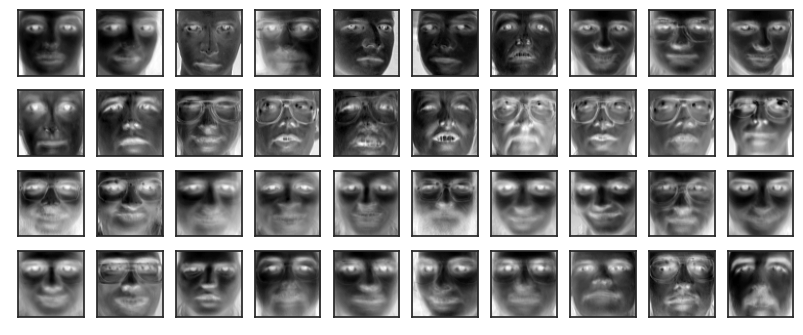

In [131]:
centroids = model.final_centroids()
#Visualization of the cluster centers of each cluster as 2-d images of all clusters
fig, ax = plt.subplots(4, 10, figsize=(10, 4))
centers = centroids.values()
for center, axi in zip(centers, ax.flat):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center.reshape(64, 64), cmap=plt.cm.binary)
plt.show()

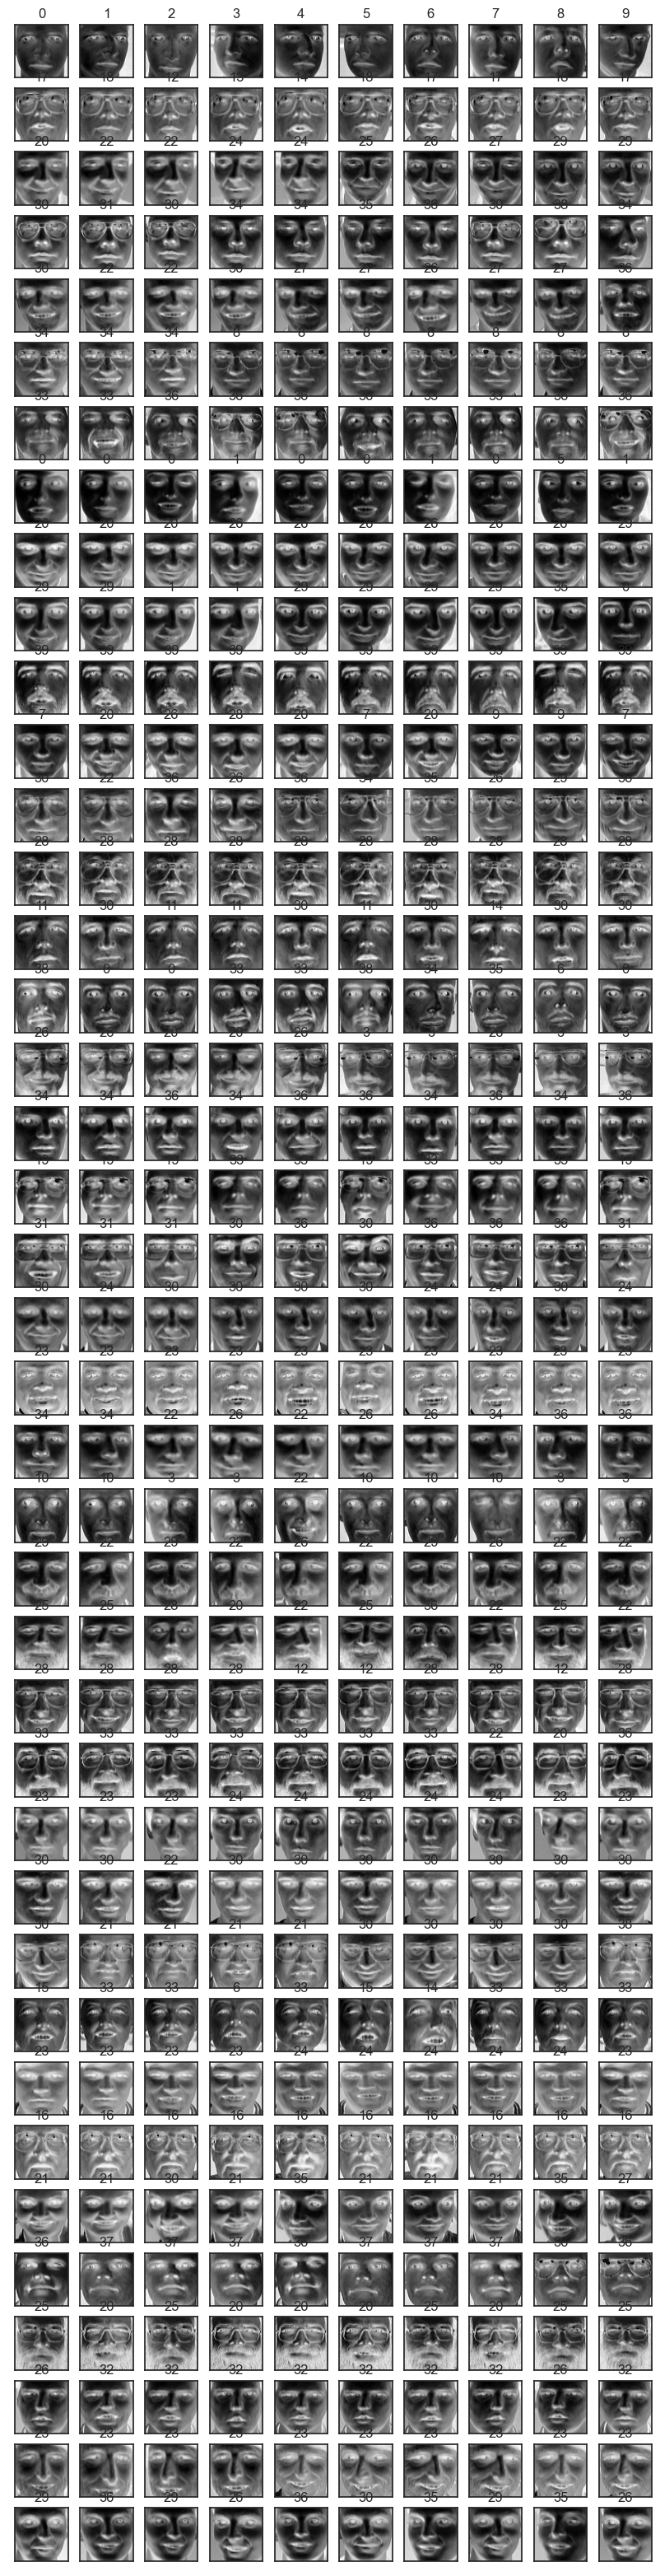

In [132]:
#visualization of the 10 images of each cluster
fig, ax = plt.subplots(40, 10, figsize=(10, 40))
for i in range(400):
    ax[i//10, i%10].imshow(faces_df.values[i].reshape(64, 64), cmap=plt.cm.binary)
    ax[i//10, i%10].set(xticks=[], yticks=[])
    ax[i//10, i%10].set_title(y_pred[i])
plt.show()


part f

In [133]:
#implementing K-means clustering for k = 10
model_2 = K_means(40, 100, [6, 16, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136, 146, 156, 166, 176, 186, 196, 206, 216, 226, 236, 246, 256, 266, 276, 286, 296, 306, 316, 326, 336, 346, 356, 366, 376, 386, 396])
model_2.fit(faces_df.values)
#predicting the clusters
y_pred_2 = []
for i in range(len(faces_df)):
    y_pred_2.append(model_2.predict(faces_df.values[i]))
# print(y_pred_2)
print(Counter(y_pred_2))



Counter({14: 26, 24: 22, 22: 18, 26: 18, 29: 17, 38: 16, 37: 15, 4: 14, 3: 13, 18: 13, 39: 12, 17: 12, 2: 11, 20: 11, 23: 11, 1: 10, 8: 10, 10: 10, 13: 10, 32: 10, 33: 10, 36: 10, 21: 9, 0: 8, 9: 8, 30: 8, 5: 7, 6: 7, 27: 7, 35: 7, 28: 6, 11: 6, 16: 5, 25: 5, 15: 4, 7: 4, 19: 4, 34: 4, 12: 1, 31: 1})


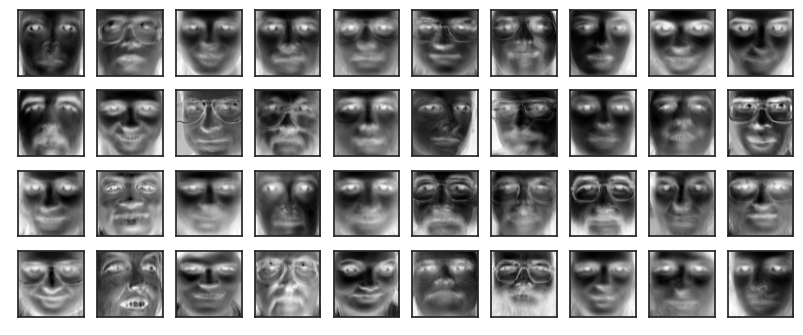

In [134]:
centroids = model_2.final_centroids()
#Visualization of the cluster centers of each cluster as 2-d images of all clusters
fig, ax = plt.subplots(4, 10, figsize=(10, 4))
centers = centroids.values()
for center, axi in zip(centers, ax.flat):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center.reshape(64, 64), cmap=plt.cm.binary)
plt.show()

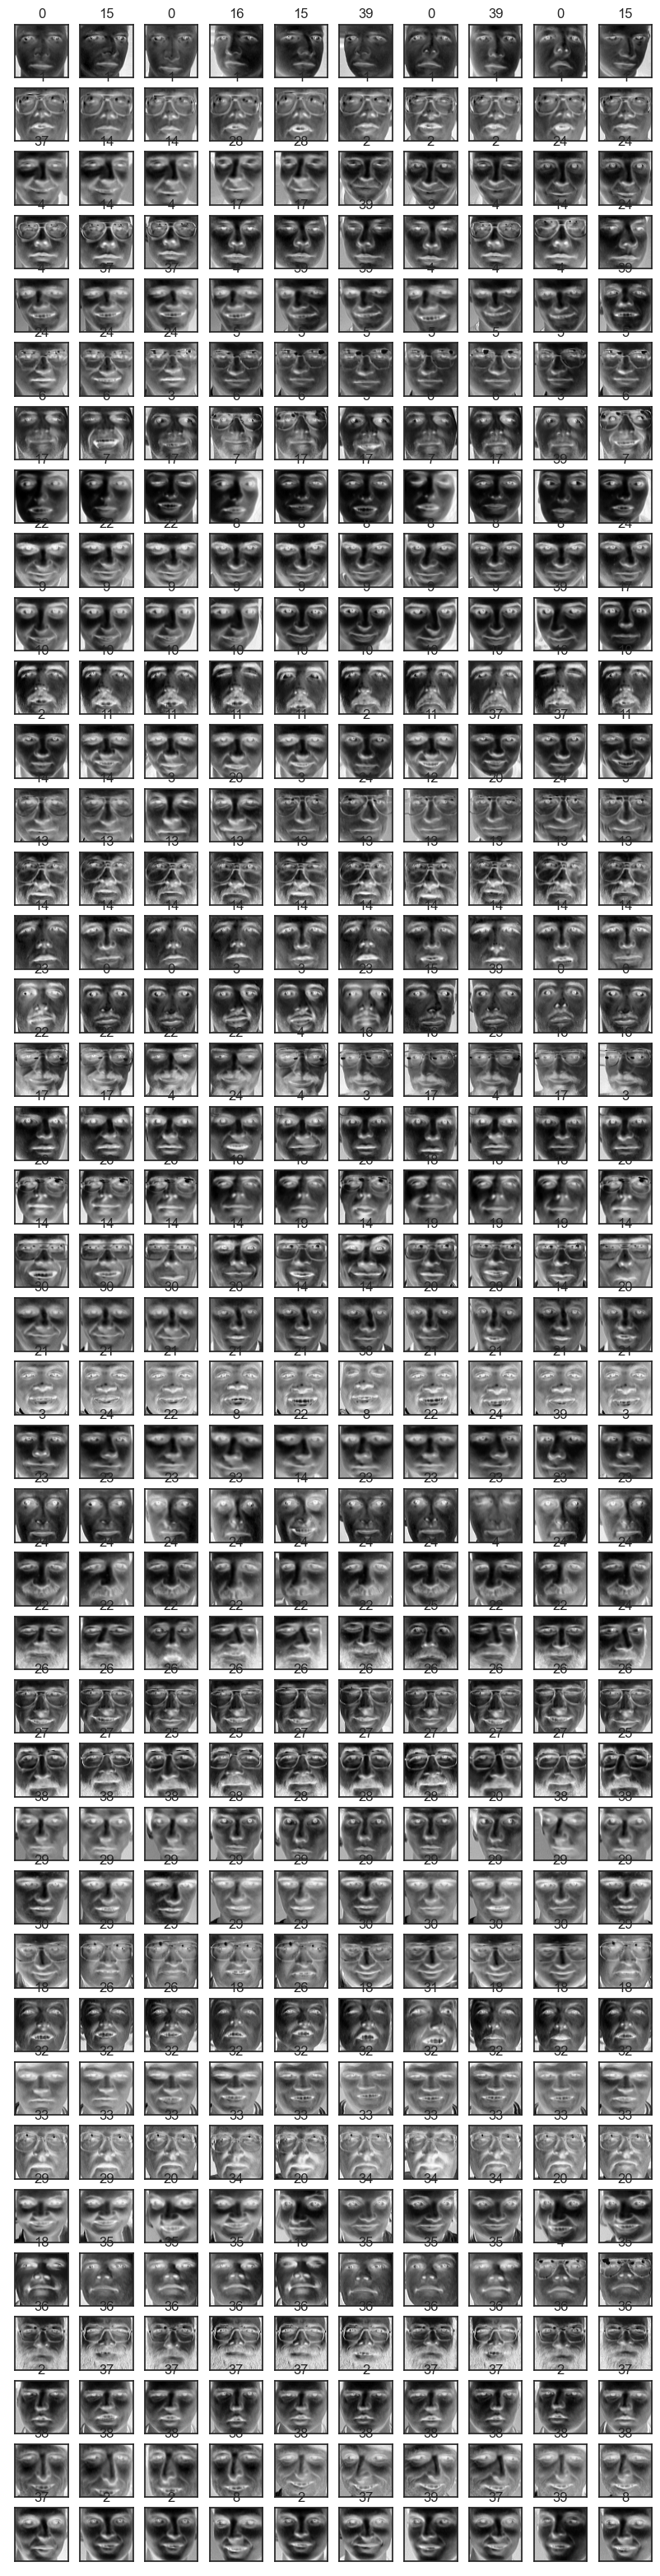

In [135]:
#visualization of the 10 images of each cluster
fig, ax = plt.subplots(40, 10, figsize=(10, 40))
for i in range(400):
    ax[i//10, i%10].imshow(faces_df.values[i].reshape(64, 64), cmap=plt.cm.binary)
    ax[i//10, i%10].set(xticks=[], yticks=[])
    ax[i//10, i%10].set_title(y_pred_2[i])
plt.show()


In [136]:
#comparing both models with SSE
print('SSE for part c : ',model.SSE())
print('SSE for part f : ',model_2.SSE())

SSE for part c :  13799.403483402302
SSE for part f :  12722.161775846207


QUESTION 3

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347

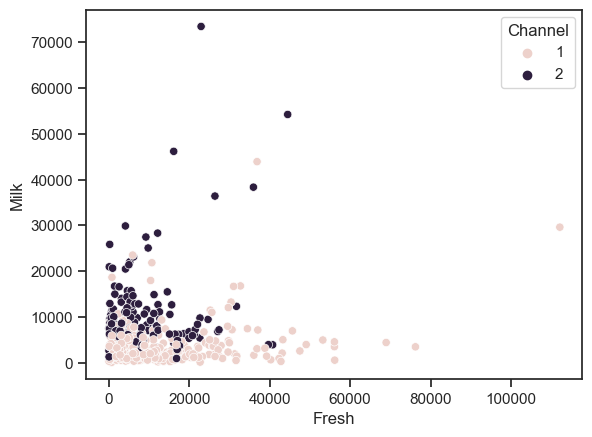

In [137]:
data = pd.read_csv('WholeSale customers data.csv')
data.head()
#make the scatter plot and set hue to be the column 'Region'
sns.scatterplot(x='Fresh', y='Milk', data=data, hue='Channel')
#preprocess the data so that the scale of each variable will be the same
y = data['Channel']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()


                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.002278  0.062169 -0.169557  0.461770  0.610179 -0.202506   
Region            0.062169  1.002278  0.055413  0.032361  0.007713 -0.021092   
Fresh            -0.169557  0.055413  1.002278  0.100739 -0.011881  0.346669   
Milk              0.461770  0.032361  0.100739  1.002278  0.729994  0.124276   
Grocery           0.610179  0.007713 -0.011881  0.729994  1.002278 -0.040284   
Frozen           -0.202506 -0.021092  0.346669  0.124276 -0.040284  1.002278   
Detergents_Paper  0.637475 -0.001486 -0.102185  0.663323  0.926747 -0.131825   
Delicassen        0.056139  0.045315  0.245247  0.407294  0.205965  0.391838   

                  Detergents_Paper  Delicassen  
Channel                   0.637475    0.056139  
Region                   -0.001486    0.045315  
Fresh                    -0.102185    0.245247  
Milk                      0.663323    0.407294  
Grocery                   0.926747

<AxesSubplot: xlabel='Fresh', ylabel='Milk'>

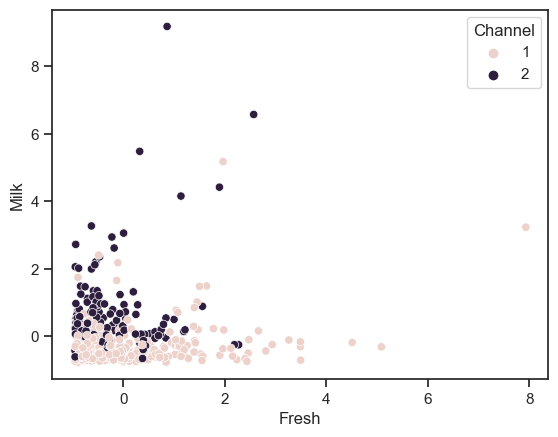

In [138]:
cov_mat=data_scaled.cov()
print(cov_mat)
#visualize the pair of features with which you can best visualize the outliers
sns.scatterplot(x='Fresh', y='Milk', data=data_scaled, hue=y)


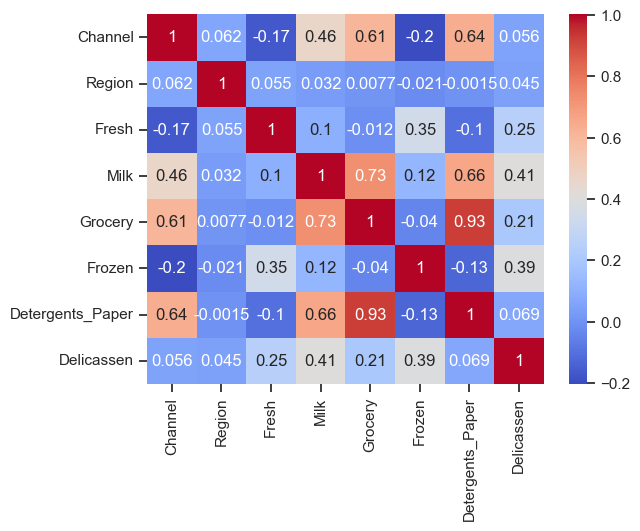

In [139]:
#plotting heatmap of data
sns.heatmap(data_scaled.cov(), annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot: xlabel='Grocery', ylabel='Detergents_Paper'>

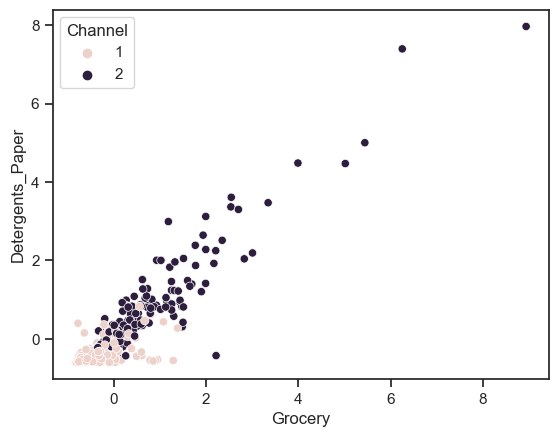

In [140]:
#visualize the pair of features with which you can best visualize the outliers
sns.scatterplot(x='Grocery', y='Detergents_Paper', data=data_scaled, hue=y)


Since the Detergents_Paper and Grocery is  having the maximum covariance So,it can be the one of best pair to visualize the outliers and the plot between them also justifies the same.

<AxesSubplot: xlabel='Fresh', ylabel='Milk'>

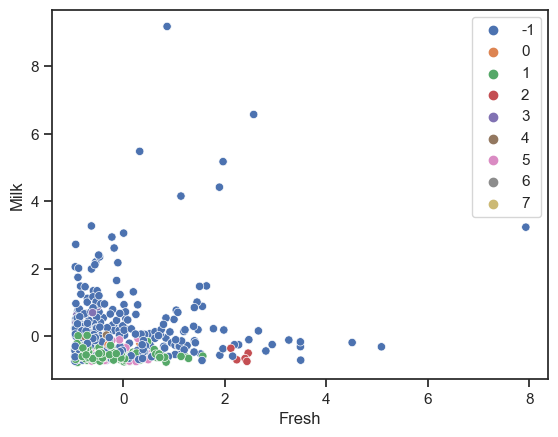

In [141]:
#applying DBSCAN to the data
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_scaled)
#visualize the clusters
sns.scatterplot(x='Fresh', y='Milk', data=data_scaled, hue=dbscan.labels_, palette='deep')

<AxesSubplot: xlabel='Grocery', ylabel='Frozen'>

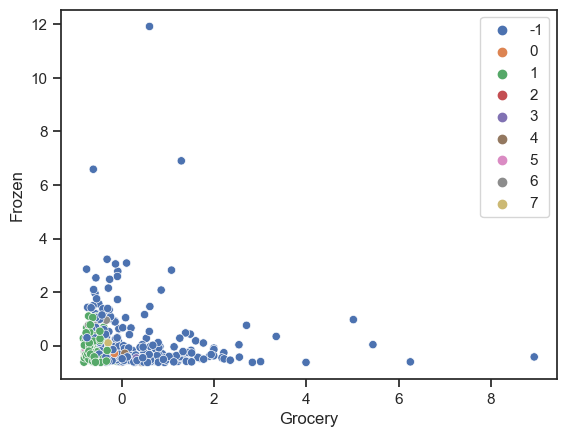

In [142]:
#visualize the clusters
sns.scatterplot(x='Grocery', y='Frozen', data=data_scaled, hue=dbscan.labels_, palette='deep')

<AxesSubplot: xlabel='Detergents_Paper', ylabel='Delicassen'>

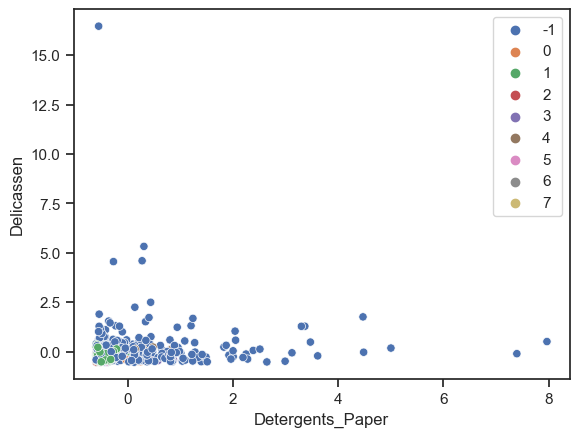

In [143]:
#visualize the clusters
sns.scatterplot(x='Detergents_Paper', y='Delicassen', data=data_scaled, hue=dbscan.labels_, palette='deep')

<AxesSubplot: xlabel='Fresh', ylabel='Delicassen'>

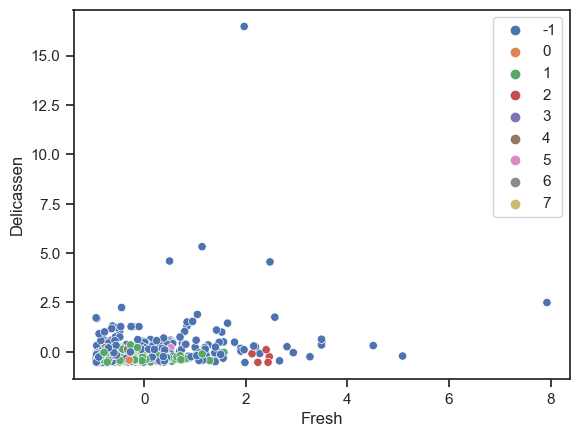

In [144]:
#visualize the clusters
sns.scatterplot(x='Fresh', y='Delicassen', data=data_scaled, hue=dbscan.labels_, palette='deep')

<AxesSubplot: xlabel='Fresh', ylabel='Milk'>

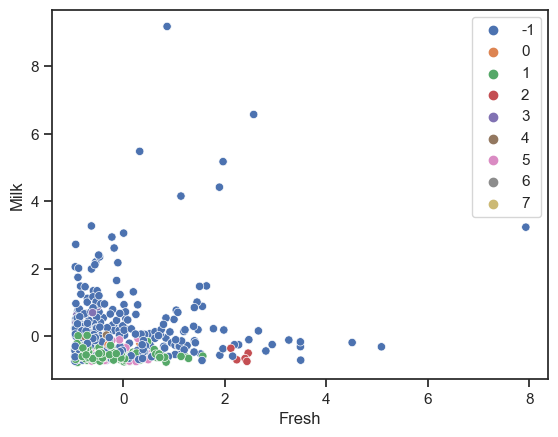

In [145]:
#visualize the clusters
sns.scatterplot(x='Fresh', y='Milk', data=data_scaled, hue=dbscan.labels_, palette='deep')

c:\python 3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: xlabel='Fresh', ylabel='Milk'>

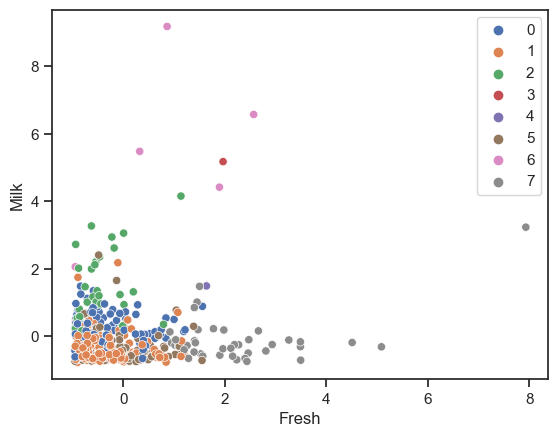

In [146]:
#applying K-means clustering to the data
kmeans = KMeans(n_clusters=8)
kmeans.fit(data_scaled)
#visualize the clusters
sns.scatterplot(x='Fresh', y='Milk', data=data_scaled, hue=kmeans.labels_, palette='deep')


<AxesSubplot: xlabel='Grocery', ylabel='Frozen'>

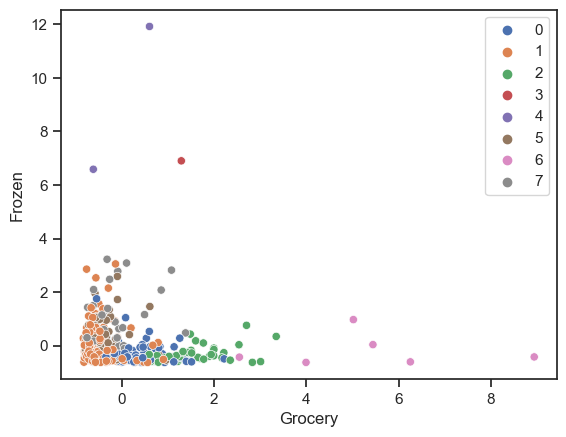

In [147]:
#visualize the clusters
sns.scatterplot(x='Grocery', y='Frozen', data=data_scaled, hue=kmeans.labels_, palette='deep')

<AxesSubplot: xlabel='Detergents_Paper', ylabel='Delicassen'>

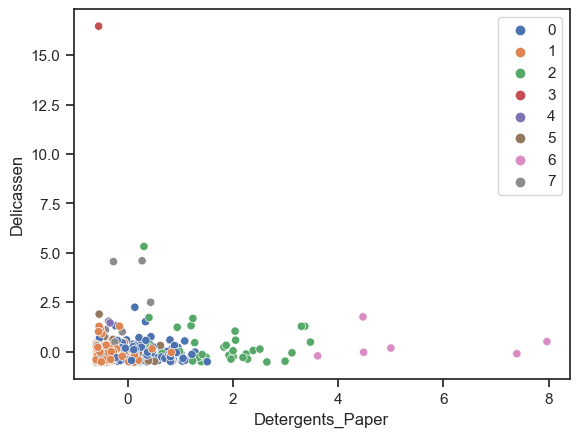

In [148]:
#visualize the clusters
sns.scatterplot(x='Detergents_Paper', y='Delicassen', data=data_scaled, hue=kmeans.labels_, palette='deep')

<AxesSubplot: xlabel='Fresh', ylabel='Delicassen'>

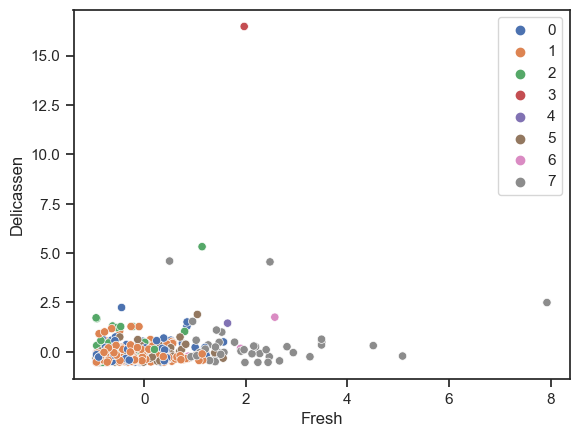

In [149]:
#visualize the clusters
sns.scatterplot(x='Fresh', y='Delicassen', data=data_scaled, hue=kmeans.labels_, palette='deep')

<AxesSubplot: xlabel='Fresh', ylabel='Milk'>

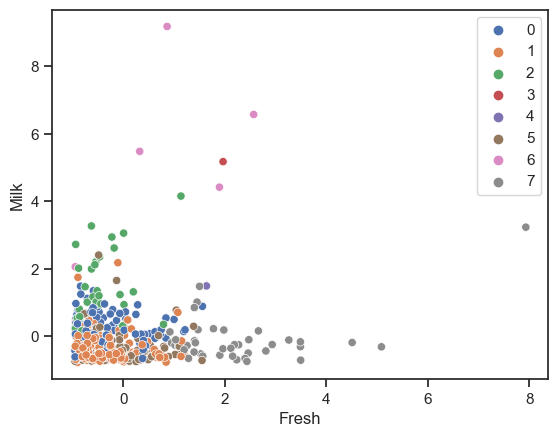

In [150]:
#visualize the clusters
sns.scatterplot(x='Fresh', y='Milk', data=data_scaled, hue=kmeans.labels_, palette='deep')

<AxesSubplot: xlabel='Grocery', ylabel='Frozen'>

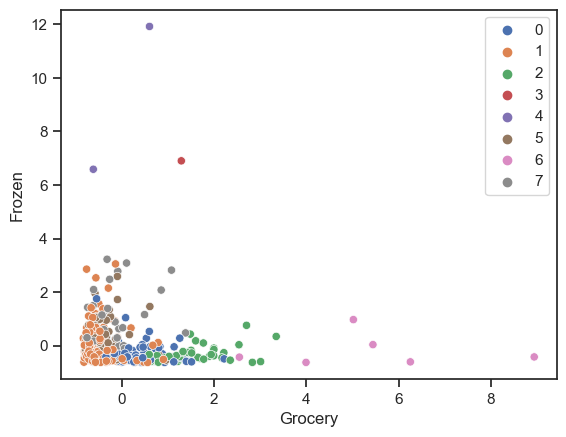

In [151]:
#visualize the clusters
sns.scatterplot(x='Grocery', y='Frozen', data=data_scaled, hue=kmeans.labels_, palette='deep')

KMeans algorithm will divide the data into clusters and then it will find the nearest neighbour of the data point and then it will assign the data point to the cluster of the nearest neighbour.And DBSCAN will find the core points and then it will find the neighbours of the core points and then it will assign the data points to the cluster of the core points.
So we can vary the number of neighbours and the value of the epsilon to find the best value of the number of clusters.
IN this DBSCAN is better than KMeans because it will find the core points and then it will find the neighbours of the core points and then it will assign the data points to the cluster of the core points and can also find the outliers which Kmeans is not able to find out.

<AxesSubplot: >

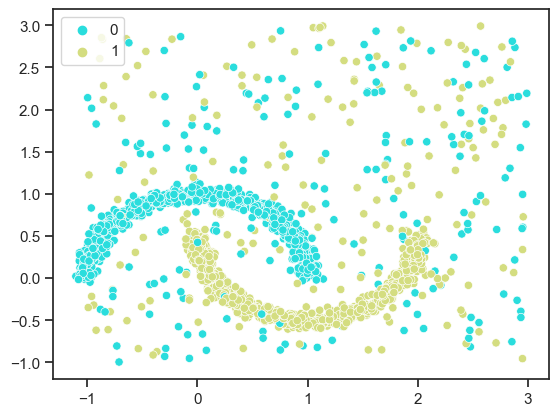

In [152]:
#making the dataset using make_moons function
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=2000, noise=0.05, random_state=5)
# Adding some noise
rand = np.random.RandomState(5)
noise = 0.2
n_noise = int(noise * len(X))
noise_indices = rand.choice(len(X), n_noise, replace=False)
X[noise_indices] = rand.uniform(-1, 3, size=(n_noise, 2))
#visualize the dataset
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='rainbow')

c:\python 3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Clusters using KMeans')

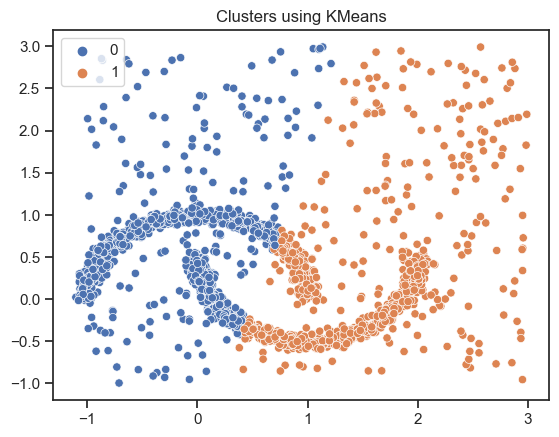

In [153]:
#applyin KMeans to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=5)
kmeans.fit(X)
#visualize the clusters
sns.scatterplot(x=X[:,0], y=X[:,1], hue=kmeans.labels_, palette='deep')
plt.title("Clusters using KMeans")


Text(0.5, 1.0, 'Clusters using DBSCAN')

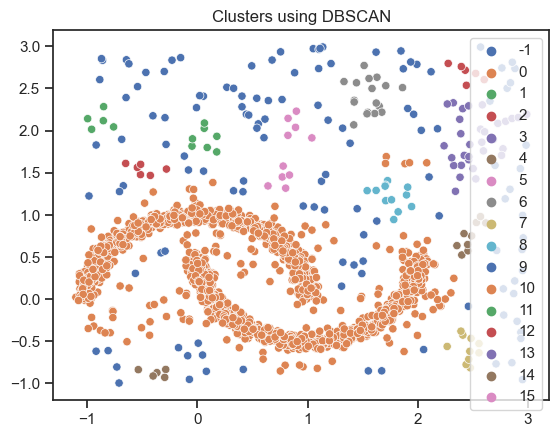

In [154]:
#applying DBSCAN to the dataset
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
#visualize the clusters
sns.scatterplot(x=X[:,0], y=X[:,1], hue=dbscan.labels_, palette='deep')
plt.title("Clusters using DBSCAN")


As we can see that from the plots also DBSCAN is way better than K-MEANS because DBSCAN is able to find the clusters properly and it is able to find the outliers also.DBSCAN has correctly clusterd the dataset into two classes but in case of the Kmeans it is not able to cluster the dataset into two classes.IN short, DBSCAN is better than K-MEANS as it can differentiate between the outliers and the normal data points.